Hace falta algo que indique con qué entorno vamos a trabajar

**por ahora lo mejor es activar el entonrno que utilizamos en clases**


Importar lo que hace falta

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_url = "../Data/properatti.csv"

In [3]:
data = pd.read_csv(data_url, encoding="utf-8")

In [4]:
data.shape

(121220, 26)

Confirmar los valores de la serie 'currency'

In [5]:
data['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Retenemos sólo las observaciones que correspondan a 'USD'

In [6]:
data = data[data['currency'] == 'USD']

In [7]:
data.shape

(87587, 26)

Determinar si la serie 'price' es igual que 'price_aprox_usd'
La suma de valores True debe ser igual a la cantidad de observaciones

In [8]:
sum(data['price'] == data['price_aprox_usd'])

87587

No hacen falta las series currency, price_aprox_local_currency y price_aprox_usd

In [9]:
data = data.drop(['currency', 'price_aprox_local_currency', 'price_aprox_usd'], axis='columns')

In [10]:
data.shape

(87587, 23)

In [11]:
data.isnull().sum()

Unnamed: 0                     0
operation                      0
property_type                  0
place_name                    23
place_with_parent_names        0
country_name                   0
state_name                     0
geonames_id                16141
lat-lon                    35051
lat                        35051
lon                        35051
price                          0
surface_total_in_m2        27267
surface_covered_in_m2      10355
price_usd_per_m2           27454
price_per_m2               10357
floor                      81278
rooms                      51573
expenses                   74935
properati_url                  0
description                    1
title                          0
image_thumbnail             1542
dtype: int64

Determinar que ocurre con price y surface

---

Hasta aquí se copia de TP1.01

---

**Por ahora** se elimina outliers en la serie price

In [12]:
data['price'].describe()

count    8.758700e+04
mean     2.603735e+05
std      4.063580e+05
min      5.000000e+03
25%      1.000000e+05
50%      1.600000e+05
75%      2.900000e+05
max      4.654544e+07
Name: price, dtype: float64

Tenemos un mínimo en el órden de 4e+05 (4.000) USD que es bajo pero aceptable 

Tenemos un máximo de 4e+07 (40.000.000) USD que complica el primer análisis

In [13]:
data[data['price']>1e+07]['price'].shape

(12,)

In [14]:
data[data['price']>1e+06]['price'].shape

(2379,)

In [15]:
data[data['price']<1e+06]['price'].shape

(85125,)

Para el prototipo nos quedamos con los valores menores a 1e+06 (1.000.000) USD

In [16]:
data[data['price']<1e+06]['price'].describe()

count     85125.000000
mean     216743.304317
std      173693.915239
min        5000.000000
25%       98421.000000
50%      155000.000000
75%      270500.000000
max      999999.000000
Name: price, dtype: float64

In [17]:
data = data[data['price']<1e+06]

In [18]:
data.shape

(85125, 23)

In [19]:
data['price'].describe()

count     85125.000000
mean     216743.304317
std      173693.915239
min        5000.000000
25%       98421.000000
50%      155000.000000
75%      270500.000000
max      999999.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

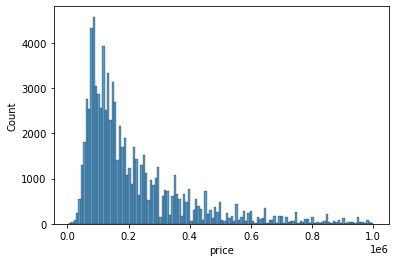

In [20]:
sns.histplot(data=data, x='price')

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price'>

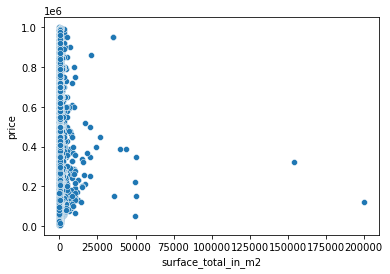

In [21]:
sns.scatterplot(x=data['surface_total_in_m2'], y=data['price'])

Para mejorar el prototipo hay que revisar los outliers en otras series

In [22]:
data['surface_covered_in_m2'].describe()

count     75004.000000
mean        123.322209
std         760.587887
min           0.000000
25%          46.000000
50%          76.000000
75%         151.000000
max      187000.000000
Name: surface_covered_in_m2, dtype: float64

---

Hasta aquí se copia de TP1.03-Alt

---

In [23]:
data['property_type'].value_counts()

apartment    48329
house        29136
PH            4998
store         2662
Name: property_type, dtype: int64

**Para el prototipo nos quedamos solo con 'apartment' y 'house'**

In [24]:
mask1 = data['property_type'] == 'apartment'
mask2 = data['property_type'] == 'house'

In [25]:
data = data[mask1 | mask2]

<AxesSubplot:xlabel='price', ylabel='Count'>

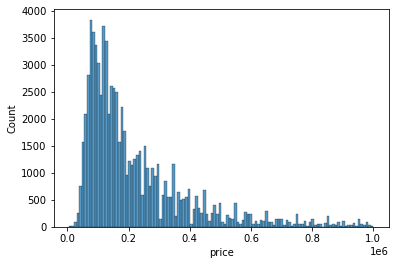

In [26]:
sns.histplot(data=data, x='price')

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price'>

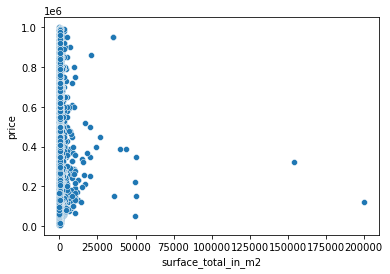

In [27]:
sns.scatterplot(x=data['surface_total_in_m2'], y=data['price'])

In [28]:
data['state_name'].value_counts()

Capital Federal                 24146
Bs.As. G.B.A. Zona Norte        20590
Bs.As. G.B.A. Zona Sur          10378
Buenos Aires Costa Atlántica     7945
Bs.As. G.B.A. Zona Oeste         6133
Córdoba                          3806
Buenos Aires Interior            1496
Santa Fe                         1469
Corrientes                        393
Mendoza                           298
Río Negro                         242
San Luis                          134
Neuquén                           128
Chubut                            123
Misiones                           51
Entre Ríos                         50
Salta                              19
Tucumán                            12
Catamarca                          12
La Pampa                           10
Chaco                               8
Tierra Del Fuego                    8
Santa Cruz                          7
Jujuy                               3
Santiago Del Estero                 2
La Rioja                            1
San Juan    

**Para el prototipo nos quedamos con las cinco primeras**

In [29]:
mask1 = data['state_name'] == 'Capital Federal'
mask2 = data['state_name'] == 'Bs.As. G.B.A. Zona Norte'
mask3 = data['state_name'] == 'Bs.As. G.B.A. Zona Sur'
mask4 = data['state_name'] == 'Buenos Aires Costa Atlántica'
mask5 = data['state_name'] == 'Bs.As. G.B.A. Zona Oeste'

In [30]:
data = data[mask1 | mask2 | mask3 | mask4 | mask5]

<AxesSubplot:xlabel='price', ylabel='Count'>

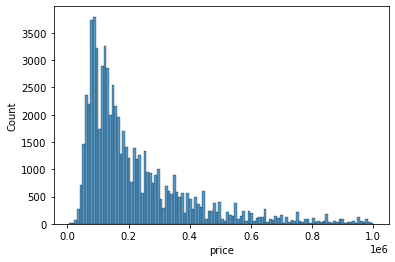

In [31]:
sns.histplot(data=data, x='price')

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price'>

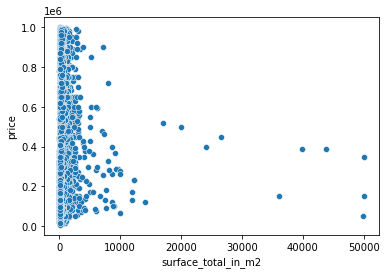

In [32]:
sns.scatterplot(x=data['surface_total_in_m2'], y=data['price'])

In [33]:
data.shape

(69192, 23)

In [34]:
data.isnull().sum()

Unnamed: 0                     0
operation                      0
property_type                  0
place_name                    20
place_with_parent_names        0
country_name                   0
state_name                     0
geonames_id                14360
lat-lon                    27556
lat                        27556
lon                        27556
price                          0
surface_total_in_m2        19794
surface_covered_in_m2       7175
price_usd_per_m2           19939
price_per_m2                7177
floor                      64137
rooms                      40031
expenses                   58239
properati_url                  0
description                    1
title                          0
image_thumbnail             1104
dtype: int64

In [35]:
# vuelvo a generar las máscaras booleanas
mask1 = data['state_name'] == 'Capital Federal'
mask2 = data['state_name'] == 'Bs.As. G.B.A. Zona Norte'
mask3 = data['state_name'] == 'Bs.As. G.B.A. Zona Sur'
mask4 = data['state_name'] == 'Buenos Aires Costa Atlántica'
mask5 = data['state_name'] == 'Bs.As. G.B.A. Zona Oeste'

mask_type1 = data['property_type'] == 'apartment'
mask_type2 = data['property_type'] == 'house'

---

<AxesSubplot:xlabel='price', ylabel='Count'>

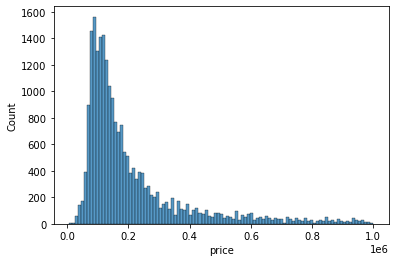

In [36]:
sns.histplot(data=data[mask1 & mask_type1], x='price')

In [37]:
data[mask1 & mask_type1][['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.00000,0.49069
surface_total_in_m2,0.49069,1.00000


<AxesSubplot:xlabel='price', ylabel='Count'>

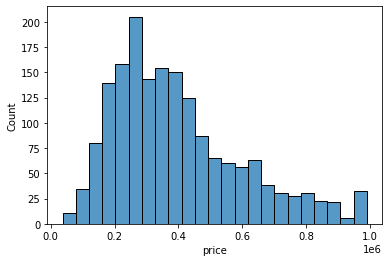

In [38]:
sns.histplot(data=data[mask1 & mask_type2], x='price')

In [39]:
data[mask1 & mask_type2][['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.613256
surface_total_in_m2,0.613256,1.000000


---

<AxesSubplot:xlabel='price', ylabel='Count'>

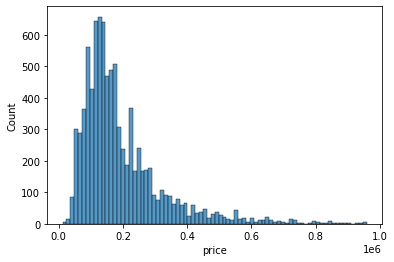

In [40]:
sns.histplot(data=data[mask2 & mask_type1], x='price')

In [41]:
data[mask2 & mask_type1][['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.208237
surface_total_in_m2,0.208237,1.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

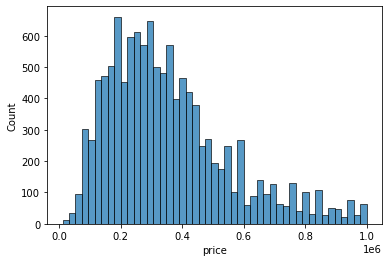

In [42]:
sns.histplot(data=data[mask2 & mask_type2], x='price')

In [43]:
data[mask2 & mask_type2][['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.089715
surface_total_in_m2,0.089715,1.000000


---

<AxesSubplot:xlabel='price', ylabel='Count'>

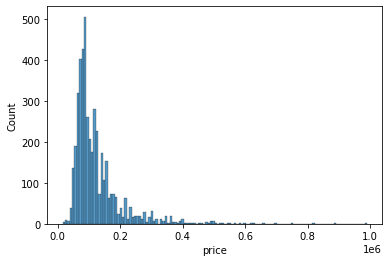

In [44]:
sns.histplot(data=data[mask3 & mask_type1], x='price')

In [45]:
data[mask3 & mask_type1][['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.566818
surface_total_in_m2,0.566818,1.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

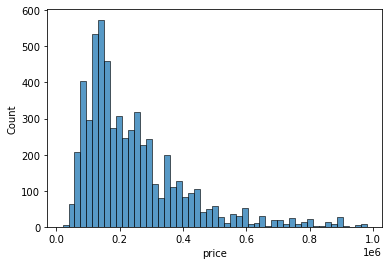

In [46]:
sns.histplot(data=data[mask3 & mask_type2], x='price')

In [47]:
data[mask3 & mask_type2][['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.198978
surface_total_in_m2,0.198978,1.000000


---

<AxesSubplot:xlabel='price', ylabel='Count'>

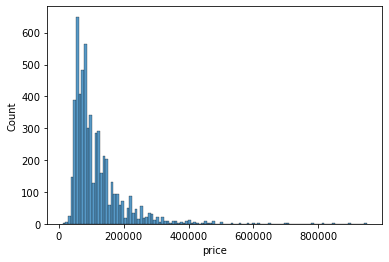

In [48]:
sns.histplot(data=data[mask4 & mask_type1], x='price')

In [49]:
data[mask4 & mask_type1][['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.022373
surface_total_in_m2,0.022373,1.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

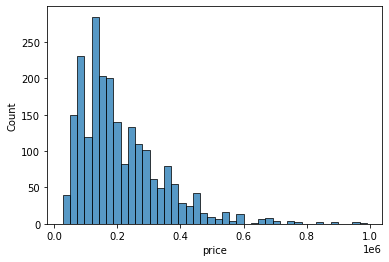

In [50]:
sns.histplot(data=data[mask4 & mask_type2], x='price')

In [51]:
data[mask4 & mask_type2][['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.082762
surface_total_in_m2,0.082762,1.000000


---

<AxesSubplot:xlabel='price', ylabel='Count'>

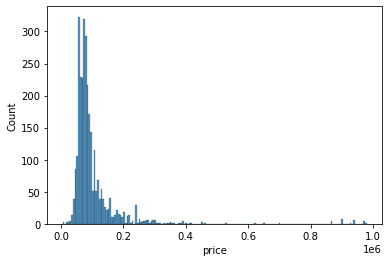

In [52]:
sns.histplot(data=data[mask5 & mask_type1], x='price')

In [53]:
data[mask5 & mask_type1][['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.196421
surface_total_in_m2,0.196421,1.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

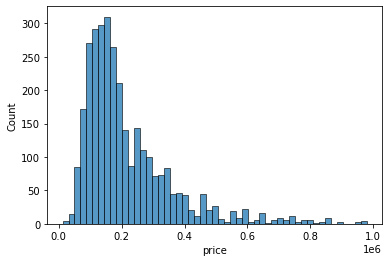

In [54]:
sns.histplot(data=data[mask5 & mask_type2], x='price')

In [55]:
data[mask5 & mask_type2][['price', 'surface_total_in_m2']].corr()

,price,surface_total_in_m2
price,1.000000,0.124979
surface_total_in_m2,0.124979,1.000000
